<a href="https://colab.research.google.com/github/oganiler/google_colab/blob/main/TF2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

In [17]:
data_numpy = pd.read_csv('moore.csv', header=None).to_numpy()

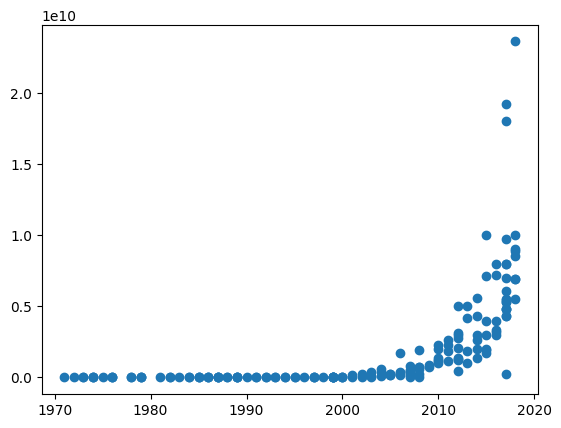

In [20]:
X = data_numpy[:, 0].reshape(-1, 1) #making an N x D matrix
Y = data_numpy[:, 1].reshape(-1, 1)
plt.scatter(X, Y)

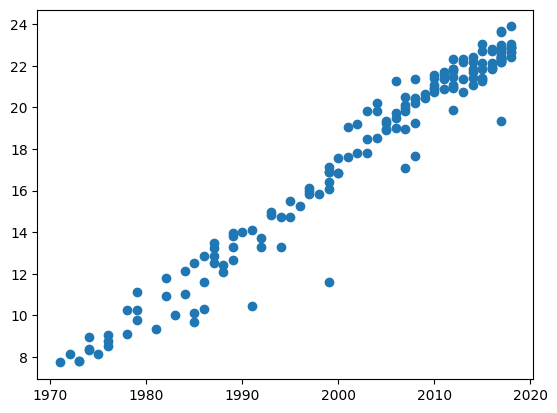

In [21]:
#since the data distribution is exponential, let's linearize it
log_Y = np.log(Y)
plt.scatter(X, log_Y)

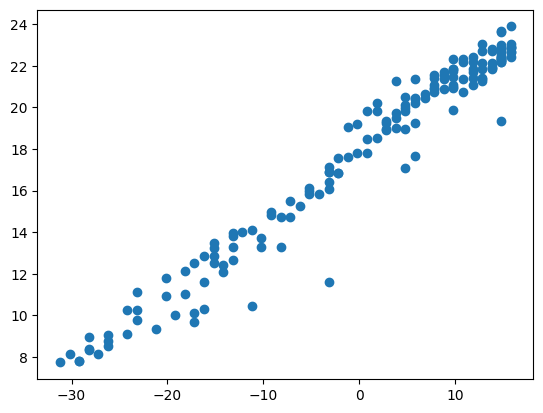

In [22]:
#normalize the x by zero mean - we could have applied the normal distribution
normalized_X = X - np.mean(X)
plt.scatter(normalized_X, log_Y)

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),# D = 1
    tf.keras.layers.Dense(1), # 1 Output
])

In [24]:
#let's use a custom optimizer other than "adam" (since we did not scale the data)
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse') #learning_rate = 0.01 momentum = 0.9 another form of Gradient Ascent

In [27]:
def schedule(epoch, learning_rate):
  if epoch >= 50:
    return 0.0001
  else:
    return 0.01


In [26]:
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule, verbose=1)

In [ ]:
#let's train the model
r = model.fit(normalized_X, log_Y, epochs=200, callbacks=[scheduler])

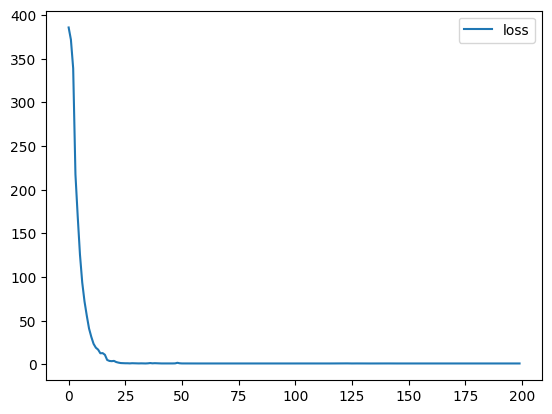

In [29]:
#plot the loss
plt.plot(r.history['loss'], label='loss')
plt.legend()

In [39]:
model.layers
model.layers[0].get_weights()

[array([[0.3481611]], dtype=float32), array([17.747759], dtype=float32)]

In [40]:
a = model.layers[0].get_weights()[0][0, 0]
a

np.float32(0.3481611)

In [41]:
print("Time to double:", np.log(2)/a)

Time to double: 1.9908805949018473


In [55]:
#let's proove with Newton Least Squares
#scale the x this time
X_new = normalized_X.flatten()
denominator = X_new.dot(X_new) - X_new.mean() * X_new.sum()
a_new = (X_new.dot(log_Y) - log_Y.mean() * X_new.sum()) / denominator
b_new = (log_Y.mean() * X_new.dot(X_new) - X_new.mean() * X_new.dot(log_Y)) / denominator
print(a_new, b_new)
print("Time to double:", np.log(2)/a_new)

[0.34168249] [17.76493939]
Time to double: [2.02862952]


In [56]:
x = normalized_X.reshape(-1, 1).astype(np.float32)
y = log_Y.reshape(-1, 1).astype(np.float32)

# Design matrix: [x, 1]
A = np.hstack([x, np.ones_like(x)])

# Least squares solution: minimizes ||A theta - y||^2
theta, *_ = np.linalg.lstsq(A, y, rcond=None)
w = float(theta[0])
b = float(theta[1])

# Set weights of Dense(1): kernel shape (1,1), bias shape (1,)
model.set_weights([np.array([[w]], dtype=np.float32),
                   np.array([b], dtype=np.float32)])

print("w,b =", w, b)

w,b = 0.341682493686676 17.76494026184082


/tmp/ipython-input-4289165300.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w = float(theta[0])
/tmp/ipython-input-4289165300.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b = float(theta[1])
